In [3]:
#-- Importamos las librerias necesarias y cargamos los datos

import torch
from torch.autograd import Variable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('MLP_regresion.csv')

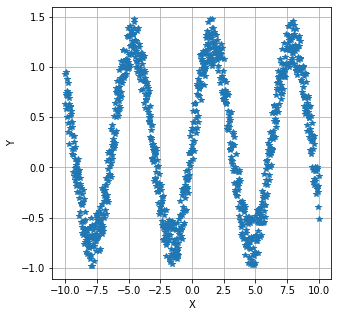

In [12]:
#-- Visualizamos los datos

x = np.array(data['X'])
y = np.array(data['Y'])

plt.figure(figsize=(7,5))
plt.plot(X, Y, '*')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [29]:
#-- Convertimos los numpys a tensores

X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X, dim=1)

Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y, dim=1)

In [30]:
#-- Definimos la primer ANN (5 capas, dos de 15 neuronas y una de 50)

input_dim = 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, 15),
    torch.nn.ReLU(),
    torch.nn.Linear(15, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 15),
    torch.nn.ReLU(),
    torch.nn.Linear(15, input_dim))

In [31]:
#-- Definimos el optimizador y el score de evaluación

optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()

In [32]:
#-- Definimos el número de épocas

n_epoch = 5001
loss_list = []

Epoch: [1/5001], loss: 0.6814920902252197


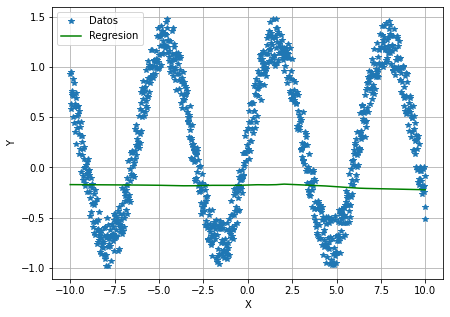

Epoch: [1001/5001], loss: 0.14787182211875916


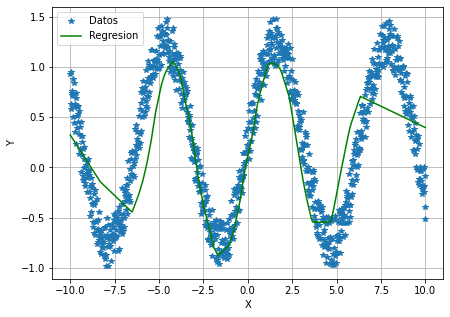

Epoch: [2001/5001], loss: 0.12080047279596329


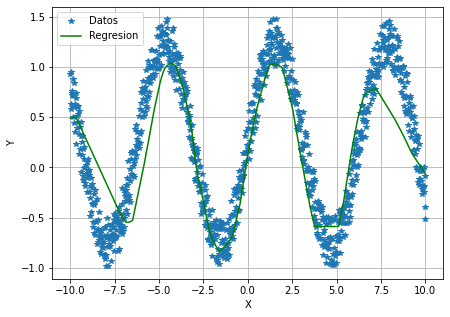

Epoch: [3001/5001], loss: 0.08042917400598526


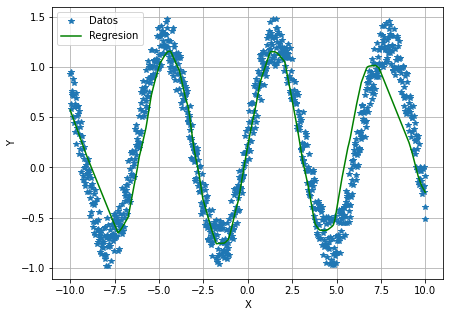

Epoch: [4001/5001], loss: 0.06848671287298203


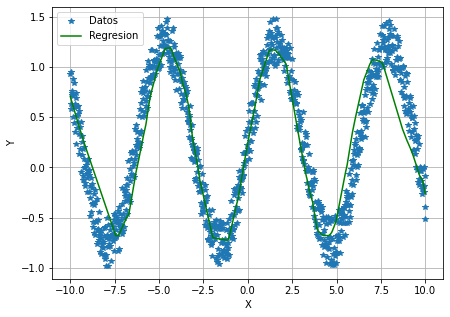

Epoch: [5001/5001], loss: 0.045127034187316895


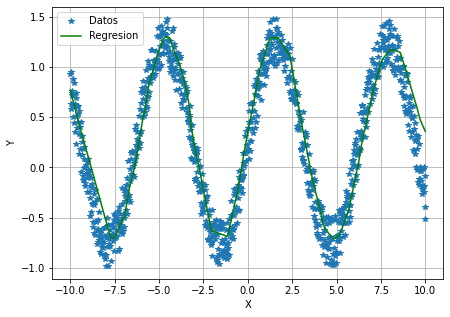

In [33]:
#-- Entrenamos la red

for epoch in range(n_epoch):

  Y_pred = model(X)

  loss = criterion(Y_pred, Y)
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch%1000 == 0):
    print('Epoch: [{}/{}], loss: {}'.format(epoch+1, n_epoch, loss.item()))
    plt.figure(figsize=(7,5))
    plt.plot(X.data.numpy(), Y.data.numpy(), '*', label='Datos')
    plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-', label='Regresion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
    plt.show()


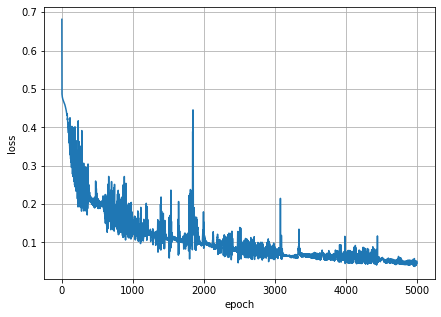

In [39]:
#-- Visualizamos el comportamiento del loss con el paso de las 5001 épocas

X_loss = np.arange(5001)
plt.figure(figsize=(7,5))
plt.plot(X_loss, loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

In [40]:
#-- Definimos la segunda ANN (3 capas de 10 neuronas)

input_dim = 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, input_dim))

In [41]:
#-- Definimos el optimizador y el score de evaluación

optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()

In [42]:
#-- Definimos el número de épocas

n_epoch = 5001
loss_list = []

Epoch: [1/5001], loss: 0.5742544531822205


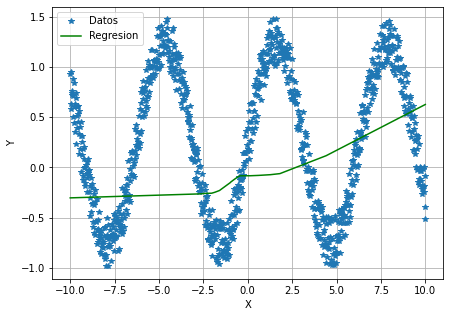

Epoch: [1001/5001], loss: 0.18819959461688995


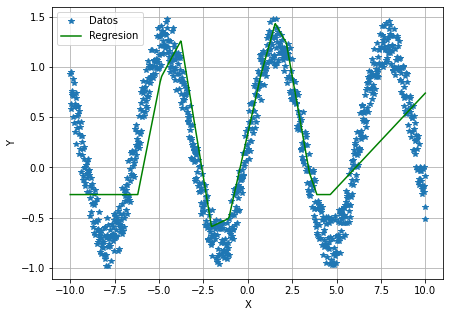

Epoch: [2001/5001], loss: 0.15764591097831726


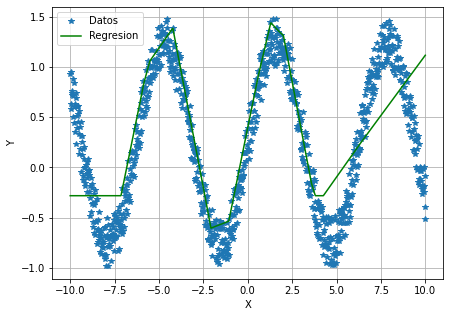

Epoch: [3001/5001], loss: 0.16192445158958435


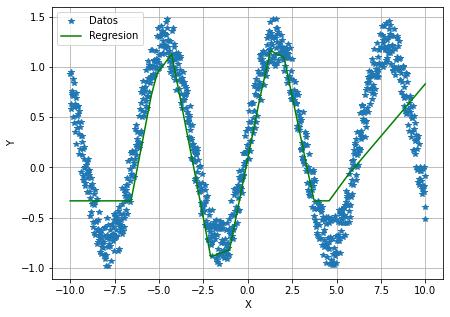

Epoch: [4001/5001], loss: 0.1539338231086731


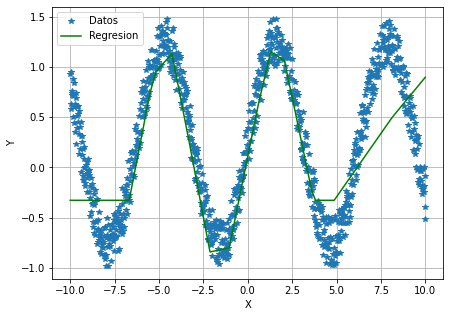

Epoch: [5001/5001], loss: 0.1511133462190628


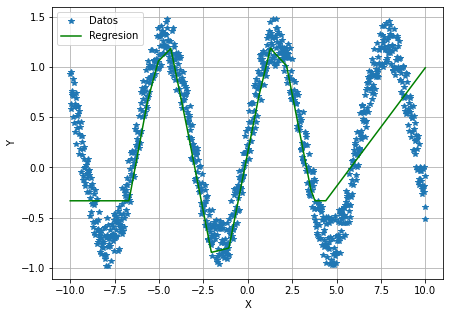

In [43]:
#-- Entrenamos la red

for epoch in range(n_epoch):

  Y_pred = model(X)

  loss = criterion(Y_pred, Y)
  loss_list.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch%1000 == 0):
    print('Epoch: [{}/{}], loss: {}'.format(epoch+1, n_epoch, loss.item()))
    plt.figure(figsize=(7,5))
    plt.plot(X.data.numpy(), Y.data.numpy(), '*', label='Datos')
    plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-', label='Regresion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
    plt.show()

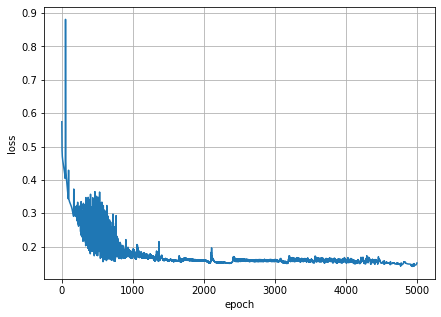

In [44]:
#-- Visualizamos el comportamiento del loss con el paso de las 5001 épocas

X_loss = np.arange(5001)
plt.figure(figsize=(7,5))
plt.plot(X_loss, loss_list)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

In [45]:
"""
Comentarios. Similitudes y diferencias:
Pese a que demostramos que utilizando menor cantidad de capas y neuronas la convergencia es más rápida y sin tanto ruido, también notamos que, 
Al ser estos parámetros menores, el loss en el que termina convergiendo el modelo es mayor, lo cual nos da un resultado menos exacto que el anterior. Como conclusión, si se cuenta con 
una máquina con espacio y procesamiento suficiente para almacenar un gran número de capas y neuronas, y de repetir el algoritmo un gran número de épocas, es preferible optar
por un modelo con gran cantidad de capas y neuronas (cuidando no caer en la sobreregresión), mientras que si se necesita un algoritmo más eficaz, sacrificando la exactitud, es mejor
optar por un modelo neuralmente más pequeño.